# Secure Enclaves

**Credit**: Oblivious Team - <a href="https://github.com/vinalb-oblivious">Vinal Bang</a>

> "Amazing. Every word of what you just said was wrong. The Rebellion is reborn today. The war is just beginning. And I will not be the last Jedi" ~ Luke Skywalker

In this session we cover: 
- Motivations
- Introduction to Secure Enclaves
- Secure Enclaves in PySyft
- Trial of Secrecy
- Brain Food
- Homework
- Bonus Materials

## Motivations

In the previous lesson we have learnt how  Secure Multi Party Computation guarantees `input privacy`

In this lesson we will look yet another input privacy technology called `Secure Enclaves`

There are several software based cryptographic techniques to guarantee input privacy like `Secure Multi-Party Computation(SMPC)`, `Homomorphic Encryption(HE)`

`Secure Enclaves` is a hardware based solution to input privacy

There are certain `advantages/disadvantages` to both `software/hardware` based input privacy solutions

To highlight some, on Performance standpoint, deep down during computation enclaves operate with unencypted text and are `highly efficient`, while there are high <br>
`compute/communication` costs for performing HE,SMPC

On Security standpoint , enclaves suffer from `side-channel attacks` where HE,SMPC do not.

In side channel attack, extra information is gather on the how the program is executed fundamentally, instead of attacking the algorithm being run. <br>
Ex: `Timing based Attack`, `Power Monitoring Attack`

Even though enclaves are prone to side channel attacks, there have been several instances in which people come up with a attack, a patch is developed and it is fixed

There were repeated cycles of attach-patch scenarios in the past research papers

In our case, if we are deploying to a enclave in the cloud.We could assume that the cloud provider is a well intended organization, and its security practices are `state-of-the-art`, as one would expect from major cloud providers today.

## Introduction to Secure Enclaves

An enclave is a protected memory region. It's an instance of a Trusted Execution Environment (TEE) which is secured by hardware.

It guarantees code and data loaded inside to be protected with respect to confidentiality and integrity

They are implemented by a special hardware unit called `MEE (Memory Encryption Engine)`, enclaves encrypt the data that leaves the processor for main memory

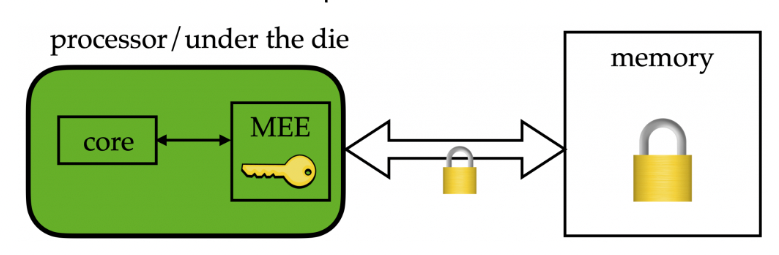

Even the superuser of the system sees only encrypted data in the main memory.

When encrypted data returns from main memory into the processor, the MEE decrypts the data and the CPU computes on decrypted data.

The data going into the processor and coming out is always encrypted giving the `illusion` that the processor is computing on the encrypted data

This is one of the important features, under the hood, the data is being processed in clear text is comparision to other cryptographic techniques(HE,SMPC) which makes it efficient.

Enclaves also provide the feature of  `remote attestation` which would allows to verify the code and data loaded onto the enclave

## Secure Enclaves in PySyft

Enclaves are implemented in PySyft on an ongoing collaboration with [Oblivious AI](https://www.oblivious.ai/)

Oblivious currenly uses `AWS Nitro Enclaves` to implement the Secure Enclave functionality

Let's view the architecture of enclaves in PySyft though a use-case problem

Assume the data scientist `Victor` would like to perform some joint computation `f(a,b)` between domains of `Alice`, `Bob` holding private `a`, `b`

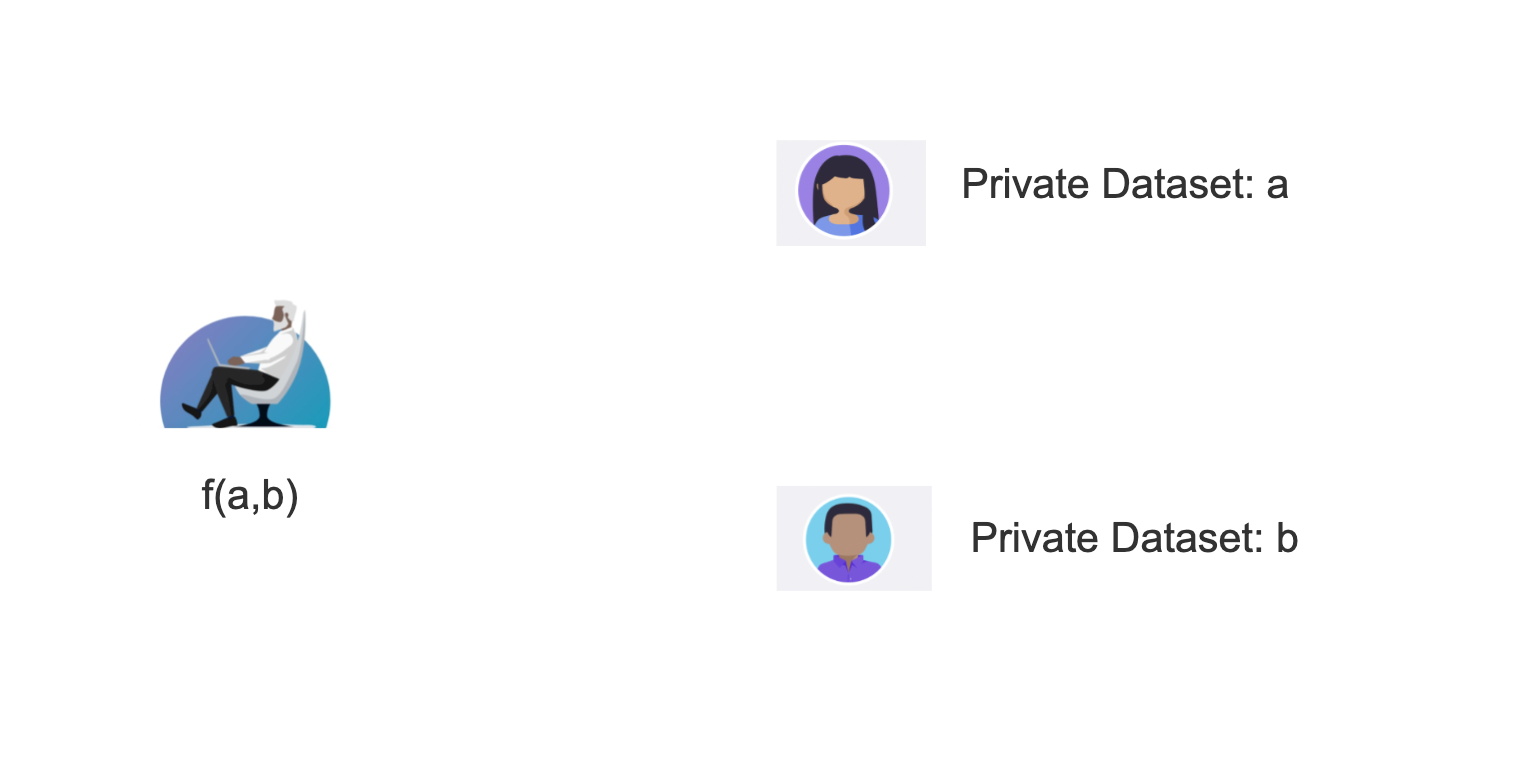

To solve this problem in privacy preserving manner , we have used SMPC in the last session

Let's solve this problem of joint computation across domains using `Secure Enclaves` which protect the input privacy of the Domains

The Data Scientist `Victor` spins up a secure enclave ,possibly in the cloud and passes the enclaves context to the Domains.

The Domains then send thier private data to the enclaves

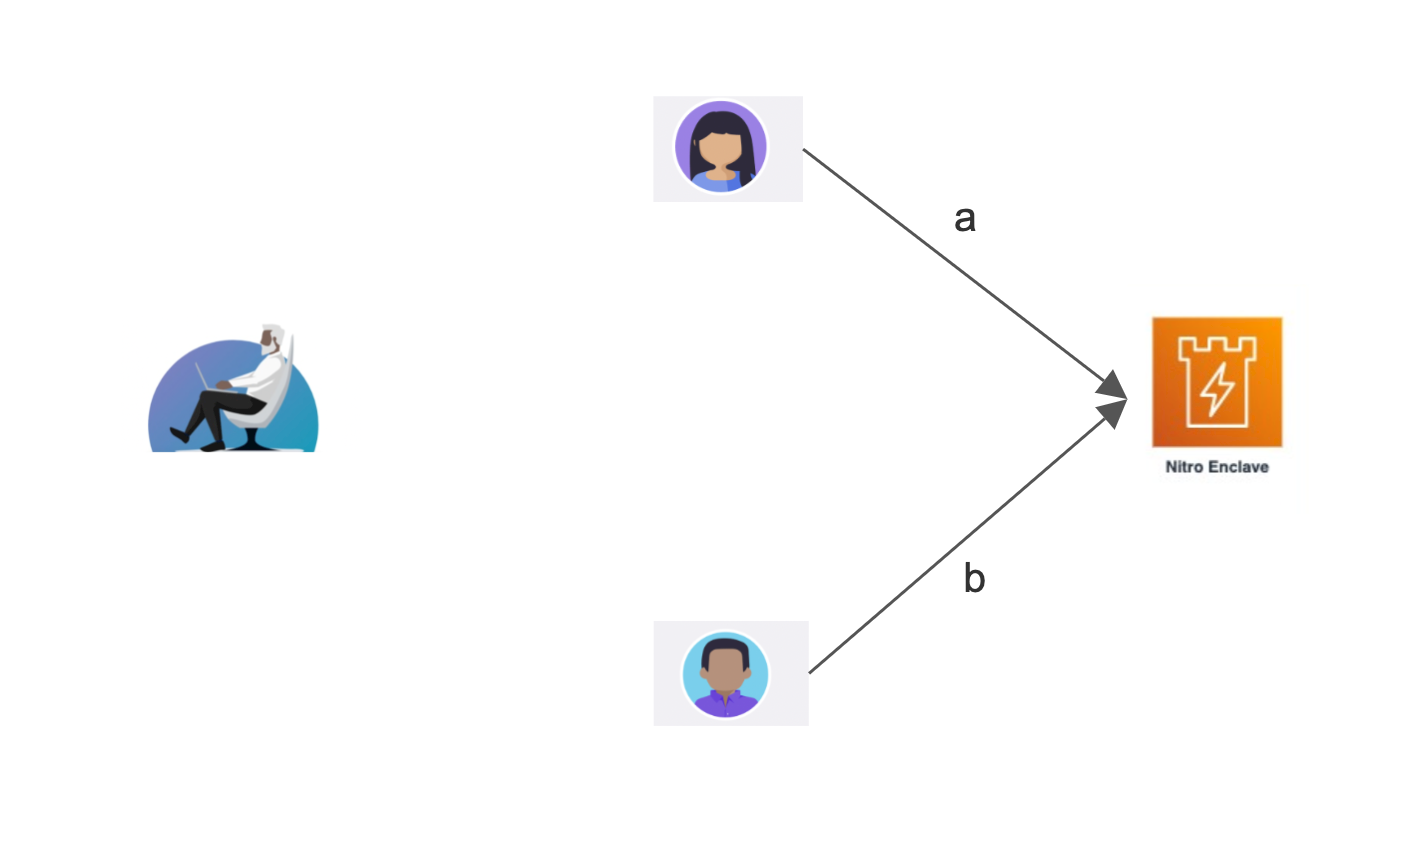

The Data Scientist perform his joint computation f(a,b) on the enclaves.

The computation which seemed as a `Distributed Computation` problem is transformed into a `Centralized Computation` problem through enclaves

This inturn has several performance benefits, under the hood it is clear text computation inside the enclaves, on what might seem encrypted computation to the attacker observing the enclaves(eg: memory access pattersn)

Since the private data was transferred to the enclaves, the Data Scientist could perform the computation interacting with the enclave.

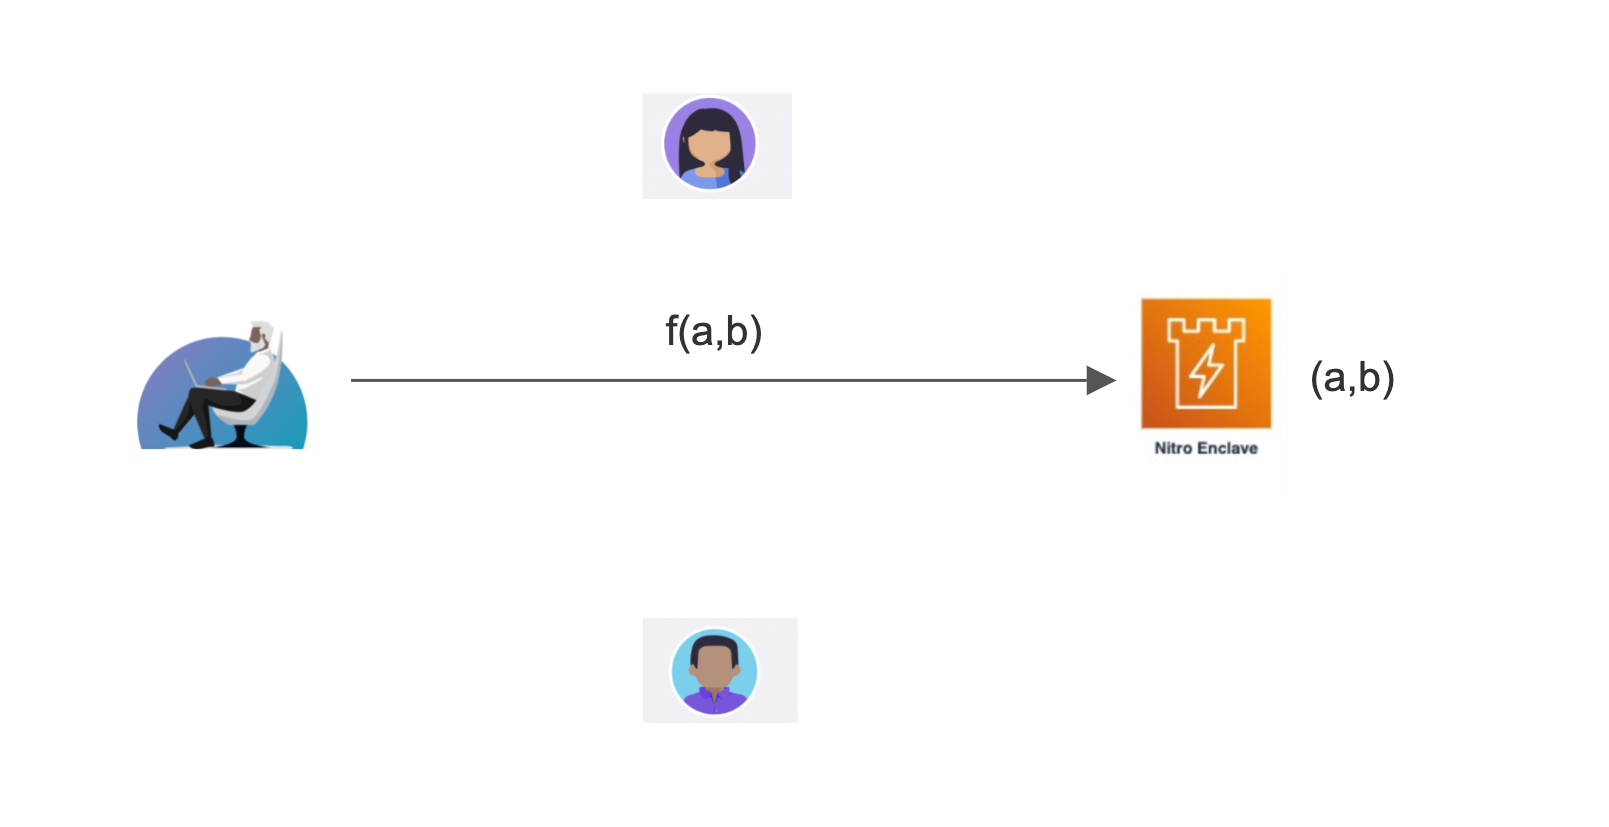

The Data Scientist could retrieve the results by using `Automatic Differential Privacy(ADP)` or through `request/response`.

This concludes the workflow of enclave pipeline in PySyft.

Let's assume the function the Data Scientist Victor would like to compute is:

```
f(a,b) = a+b
```

Let's view the internals of how this operation is implemented in PySyft

Initially lets start exploring how a data scientist could deploy an Enclave

## Oblivious Console

Each Data scientist intending to deploy an enclave should have an `Oblivious Console` account

<blockquote><strong>🔗 Web Link</strong><br /><a href="https://console.oblivious.ai/">Oblivious Console</a></blockquote>

The Oblivious Console account would allow the Data scientist deploy AWS Nitro Enclaves provisioned by `Oblivious AI`

Through the Oblivious Console account we could view the current enclave deployments in the cloud and also the credits used for the deployments

Currently Oblivious supports `Github` for deploying services(user application code).

We model anything we want to run inside a enclave as a `service` , which contains logic for performing tasks on incoming connection to the enclaves

Let's look at what a service is in oblivious terminology

### Oblivious Service

A `Service` is a specific branch or release/tag of a repository containing a special directory `.oblivious` and a special file `service.yaml` which holds the information for the Oblivious Console to build and run it inside a secure enclave.

We could view the currently available services on the Oblivious Console

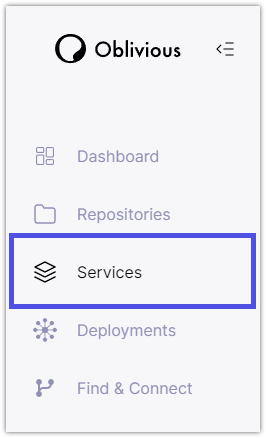

The services contains application logic on performing computations inside the enclave for incoming requests

Oblivious AI has demo service repository, which we could use it for experimenting with enclaves

<blockquote><strong>🔗 Web Link</strong><br /><a href="https://github.com/ObliviousAI/FastAPI-Enclave-Services">FastAPI Enclave Services</a></blockquote>

In context, in addition to PySyft repository ,we need to have an additional repository which we could deploy on the enclaves.

We would also need to connect our github account on the Oblivious Console, as it verifies if the user has `read/write permission` during deployment of a service

## Oblivious CLI

Oblivious CLI is needed which would allow a client to able to interact with the enclave

<blockquote><strong>🔗 Web Link</strong><br /><a href="https://docs.oblivious.ai/cli/binaries">Oblivious CLI</a></blockquote>

Oblivious client CLI is responsible for:

1. Establishing a secure connection to an enclave.
2. Verification of the enclave.
3. Encrypting and forwarding client application requests to the enclave

The Oblivious CLI interacts with the encalve and retrieves a symmetric key which is to be used for further communication.

In `Symmetric Key Encryption` , both the sender and receiver use the same key for encrypting/decrypting messages.

Once a connection is established the client applications running on the user's device have a secure communication channel established to the enclave.

This is achieved by having a reverse proxy running on the client that listens to the localhost on a particular port for any requests from the client applications

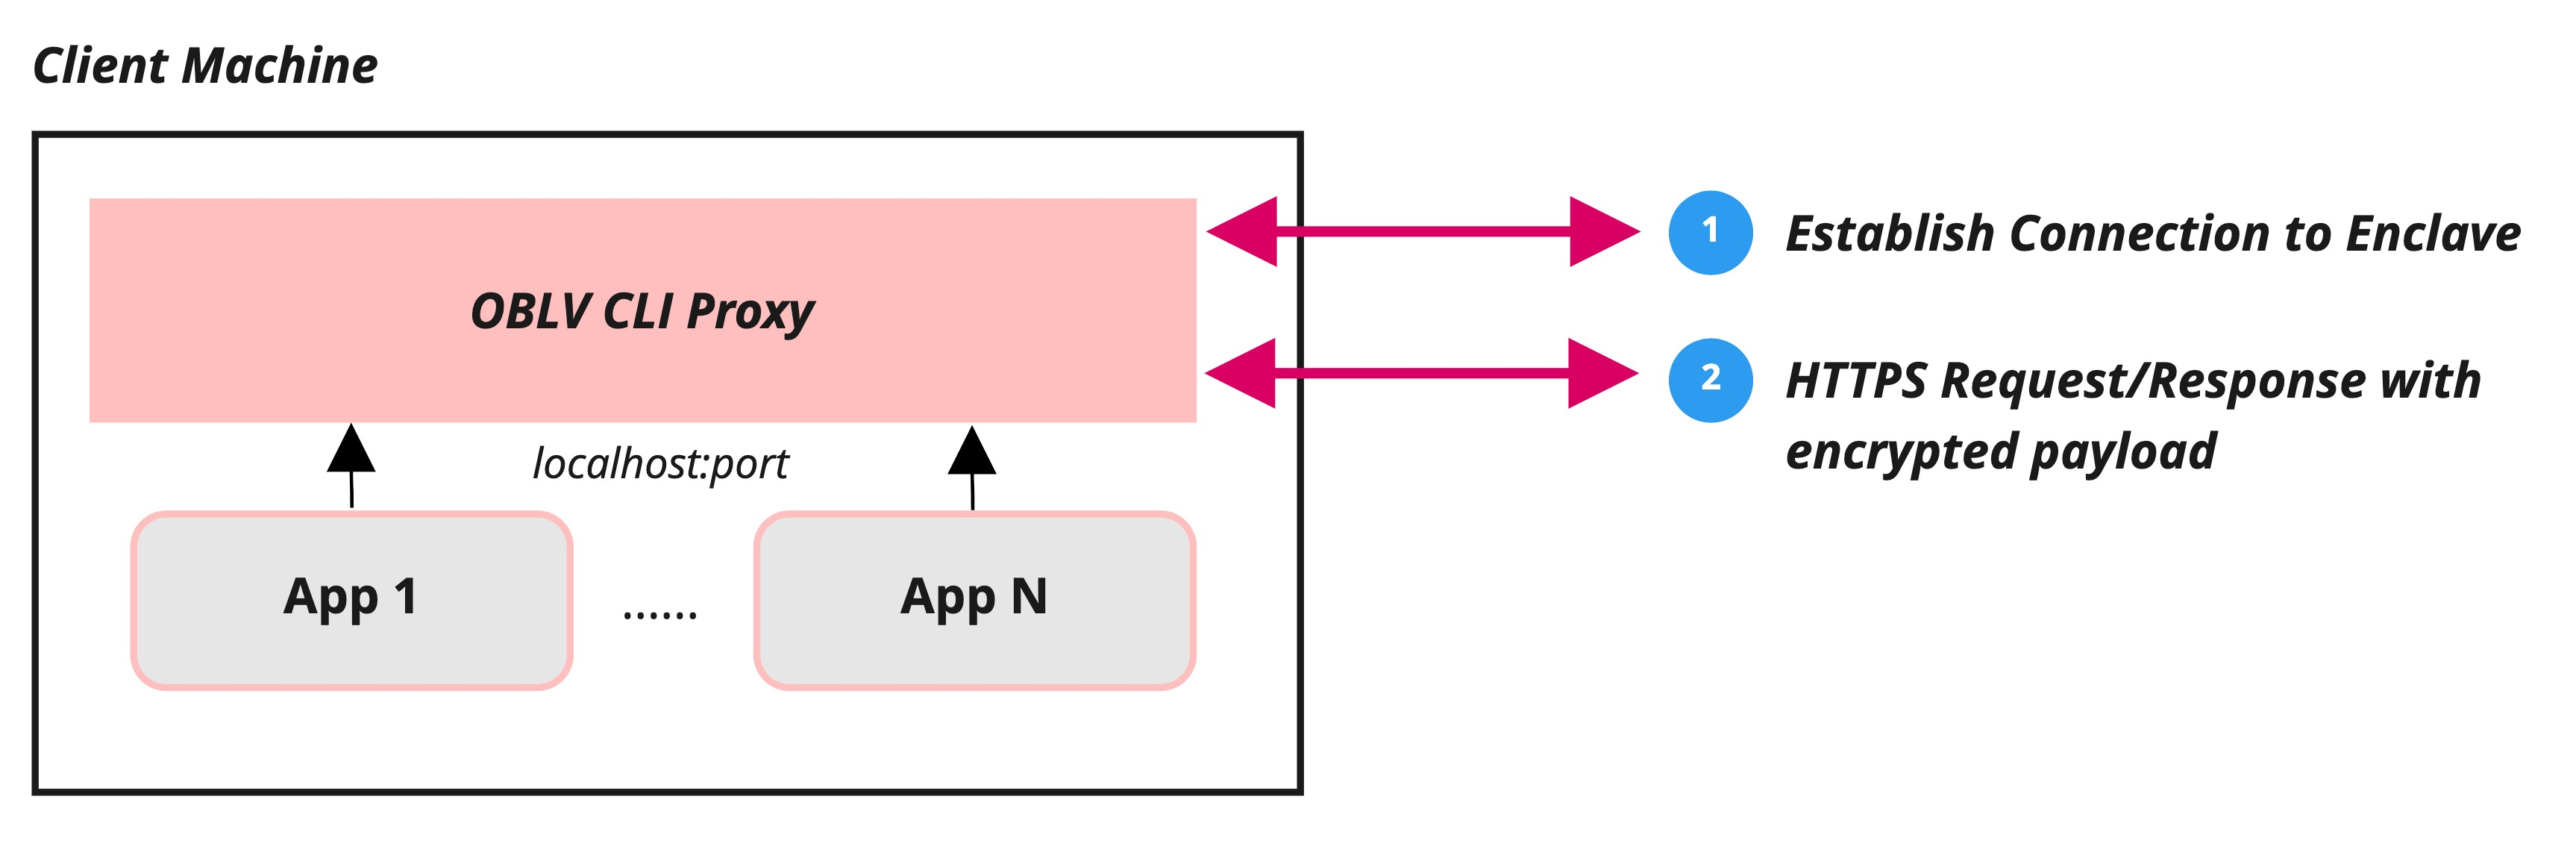

Once a request is received, the payload is encrypted along with the shared symmetric key, and the request is sent to the enclave

## Encalve Demo

Let's dive in and view a code example of enclaves in PySyft

<table style="border:1px solid gray;" width="100%"><tr><td align="left" valign="top" width="50px;" style="padding-top:0; padding-left:15px;"><img style="margin-top:0px;" src="data:image/webp;base64, UklGRjAjAABXRUJQVlA4WAoAAAA0AAAAYwAAYwAASUNDUEgMAAAAAAxITGlubwIQ
AABtbnRyUkdCIFhZWiAHzgACAAkABgAxAABhY3NwTVNGVAAAAABJRUMgc1JHQgAA
AAAAAAAAAAAAAAAA9tYAAQAAAADTLUhQICAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABFjcHJ0AAABUAAAADNkZXNjAAABhAAA
AGx3dHB0AAAB8AAAABRia3B0AAACBAAAABRyWFlaAAACGAAAABRnWFlaAAACLAAA
ABRiWFlaAAACQAAAABRkbW5kAAACVAAAAHBkbWRkAAACxAAAAIh2dWVkAAADTAAA
AIZ2aWV3AAAD1AAAACRsdW1pAAAD+AAAABRtZWFzAAAEDAAAACR0ZWNoAAAEMAAA
AAxyVFJDAAAEPAAACAxnVFJDAAAEPAAACAxiVFJDAAAEPAAACAx0ZXh0AAAAAENv
cHlyaWdodCAoYykgMTk5OCBIZXdsZXR0LVBhY2thcmQgQ29tcGFueQAAZGVzYwAA
AAAAAAASc1JHQiBJRUM2MTk2Ni0yLjEAAAAAAAAAAAAAABJzUkdCIElFQzYxOTY2
LTIuMQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAWFlaIAAAAAAAAPNRAAEAAAABFsxYWVogAAAAAAAAAAAAAAAAAAAAAFhZ
WiAAAAAAAABvogAAOPUAAAOQWFlaIAAAAAAAAGKZAAC3hQAAGNpYWVogAAAAAAAA
JKAAAA+EAAC2z2Rlc2MAAAAAAAAAFklFQyBodHRwOi8vd3d3LmllYy5jaAAAAAAA
AAAAAAAAFklFQyBodHRwOi8vd3d3LmllYy5jaAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABkZXNjAAAAAAAAAC5JRUMgNjE5NjYt
Mi4xIERlZmF1bHQgUkdCIGNvbG91ciBzcGFjZSAtIHNSR0IAAAAAAAAAAAAAAC5J
RUMgNjE5NjYtMi4xIERlZmF1bHQgUkdCIGNvbG91ciBzcGFjZSAtIHNSR0IAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAZGVzYwAAAAAAAAAsUmVmZXJlbmNlIFZpZXdpbmcg
Q29uZGl0aW9uIGluIElFQzYxOTY2LTIuMQAAAAAAAAAAAAAALFJlZmVyZW5jZSBW
aWV3aW5nIENvbmRpdGlvbiBpbiBJRUM2MTk2Ni0yLjEAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAHZpZXcAAAAAABOk/gAUXy4AEM8UAAPtzAAEEwsAA1yeAAAAAVhZ
WiAAAAAAAEwJVgBQAAAAVx/nbWVhcwAAAAAAAAABAAAAAAAAAAAAAAAAAAAAAAAA
Ao8AAAACc2lnIAAAAABDUlQgY3VydgAAAAAAAAQAAAAABQAKAA8AFAAZAB4AIwAo
AC0AMgA3ADsAQABFAEoATwBUAFkAXgBjAGgAbQByAHcAfACBAIYAiwCQAJUAmgCf
AKQAqQCuALIAtwC8AMEAxgDLANAA1QDbAOAA5QDrAPAA9gD7AQEBBwENARMBGQEf
ASUBKwEyATgBPgFFAUwBUgFZAWABZwFuAXUBfAGDAYsBkgGaAaEBqQGxAbkBwQHJ
AdEB2QHhAekB8gH6AgMCDAIUAh0CJgIvAjgCQQJLAlQCXQJnAnECegKEAo4CmAKi
AqwCtgLBAssC1QLgAusC9QMAAwsDFgMhAy0DOANDA08DWgNmA3IDfgOKA5YDogOu
A7oDxwPTA+AD7AP5BAYEEwQgBC0EOwRIBFUEYwRxBH4EjASaBKgEtgTEBNME4QTw
BP4FDQUcBSsFOgVJBVgFZwV3BYYFlgWmBbUFxQXVBeUF9gYGBhYGJwY3BkgGWQZq
BnsGjAadBq8GwAbRBuMG9QcHBxkHKwc9B08HYQd0B4YHmQesB78H0gflB/gICwgf
CDIIRghaCG4IggiWCKoIvgjSCOcI+wkQCSUJOglPCWQJeQmPCaQJugnPCeUJ+woR
CicKPQpUCmoKgQqYCq4KxQrcCvMLCwsiCzkLUQtpC4ALmAuwC8gL4Qv5DBIMKgxD
DFwMdQyODKcMwAzZDPMNDQ0mDUANWg10DY4NqQ3DDd4N+A4TDi4OSQ5kDn8Omw62
DtIO7g8JDyUPQQ9eD3oPlg+zD88P7BAJECYQQxBhEH4QmxC5ENcQ9RETETERTxFt
EYwRqhHJEegSBxImEkUSZBKEEqMSwxLjEwMTIxNDE2MTgxOkE8UT5RQGFCcUSRRq
FIsUrRTOFPAVEhU0FVYVeBWbFb0V4BYDFiYWSRZsFo8WshbWFvoXHRdBF2UXiReu
F9IX9xgbGEAYZRiKGK8Y1Rj6GSAZRRlrGZEZtxndGgQaKhpRGncanhrFGuwbFBs7
G2MbihuyG9ocAhwqHFIcexyjHMwc9R0eHUcdcB2ZHcMd7B4WHkAeah6UHr4e6R8T
Hz4faR+UH78f6iAVIEEgbCCYIMQg8CEcIUghdSGhIc4h+yInIlUigiKvIt0jCiM4
I2YjlCPCI/AkHyRNJHwkqyTaJQklOCVoJZclxyX3JicmVyaHJrcm6CcYJ0kneier
J9woDSg/KHEooijUKQYpOClrKZ0p0CoCKjUqaCqbKs8rAis2K2krnSvRLAUsOSxu
LKIs1y0MLUEtdi2rLeEuFi5MLoIuty7uLyQvWi+RL8cv/jA1MGwwpDDbMRIxSjGC
Mbox8jIqMmMymzLUMw0zRjN/M7gz8TQrNGU0njTYNRM1TTWHNcI1/TY3NnI2rjbp
NyQ3YDecN9c4FDhQOIw4yDkFOUI5fzm8Ofk6Njp0OrI67zstO2s7qjvoPCc8ZTyk
POM9Ij1hPaE94D4gPmA+oD7gPyE/YT+iP+JAI0BkQKZA50EpQWpBrEHuQjBCckK1
QvdDOkN9Q8BEA0RHRIpEzkUSRVVFmkXeRiJGZ0arRvBHNUd7R8BIBUhLSJFI10kd
SWNJqUnwSjdKfUrESwxLU0uaS+JMKkxyTLpNAk1KTZNN3E4lTm5Ot08AT0lPk0/d
UCdQcVC7UQZRUFGbUeZSMVJ8UsdTE1NfU6pT9lRCVI9U21UoVXVVwlYPVlxWqVb3
V0RXklfgWC9YfVjLWRpZaVm4WgdaVlqmWvVbRVuVW+VcNVyGXNZdJ114XcleGl5s
Xr1fD19hX7NgBWBXYKpg/GFPYaJh9WJJYpxi8GNDY5dj62RAZJRk6WU9ZZJl52Y9
ZpJm6Gc9Z5Nn6Wg/aJZo7GlDaZpp8WpIap9q92tPa6dr/2xXbK9tCG1gbbluEm5r
bsRvHm94b9FwK3CGcOBxOnGVcfByS3KmcwFzXXO4dBR0cHTMdSh1hXXhdj52m3b4
d1Z3s3gReG54zHkqeYl553pGeqV7BHtje8J8IXyBfOF9QX2hfgF+Yn7CfyN/hH/l
gEeAqIEKgWuBzYIwgpKC9INXg7qEHYSAhOOFR4Wrhg6GcobXhzuHn4gEiGmIzokz
iZmJ/opkisqLMIuWi/yMY4zKjTGNmI3/jmaOzo82j56QBpBukNaRP5GokhGSepLj
k02TtpQglIqU9JVflcmWNJaflwqXdZfgmEyYuJkkmZCZ/JpomtWbQpuvnByciZz3
nWSd0p5Anq6fHZ+Ln/qgaaDYoUehtqImopajBqN2o+akVqTHpTilqaYapoum/adu
p+CoUqjEqTepqaocqo+rAqt1q+msXKzQrUStuK4trqGvFq+LsACwdbDqsWCx1rJL
ssKzOLOutCW0nLUTtYq2AbZ5tvC3aLfguFm40blKucK6O7q1uy67p7whvJu9Fb2P
vgq+hL7/v3q/9cBwwOzBZ8Hjwl/C28NYw9TEUcTOxUvFyMZGxsPHQce/yD3IvMk6
ybnKOMq3yzbLtsw1zLXNNc21zjbOts83z7jQOdC60TzRvtI/0sHTRNPG1EnUy9VO
1dHWVdbY11zX4Nhk2OjZbNnx2nba+9uA3AXcit0Q3ZbeHN6i3ynfr+A24L3hROHM
4lPi2+Nj4+vkc+T85YTmDeaW5x/nqegy6LzpRunQ6lvq5etw6/vshu0R7ZzuKO60
70DvzPBY8OXxcvH/8ozzGfOn9DT0wvVQ9d72bfb794r4Gfio+Tj5x/pX+uf7d/wH
/Jj9Kf26/kv+3P9t//9BTFBIfQQAAAGgRW2bIUn6IyIjI9W2Z23btnds27Zt2/aV
bdu2PTtqVVbGRXcp89/7iJgACCd/Y8btp9vKWAAAaqnThatfJpRSIXSdazGxlMZG
a1zXhUYJJRCkVWbb09sz3uDgTvb7WSmlzO0XBwD/3JNSns0RKqcAAIoZl5AYZzIA
AKqqQnBOiovrlyullGf/YO5I2+AUkfdKElBHO1JKWR5Afe2fFoNnL129fuPG9auX
zh7c/J/XdADKFN1gAEBK3pNFnQ1p7vjML4vfxUCfJIt2aLbqsc/2OzJIx2/77q9s
+jwBANXgwHbJ4v2fuqOCDNwhlpe8WSSCvqODfnpeAx7XXgau4I4f/YHsD6JLnY+Q
lDJ/59Dfoz6wA/l/cMezxwPJbVtv+yMnpX1n+w4Z+Piz7uCdCgN5sbATdwe8vMdL
e14Gl6q9vdRbdQmzrD3e2WtZzA1EMVmJeZ5xZmVTk5OIUSHgm3U+z0i55TcuNBop
TZBqlxzp5YvVuG6RyHAmWhdIj+fVUrhKIkA1ZnX+T3re1yWBWzR8QojBDyWCuf3j
dY2ESxF8WKFEMa8LNdQwMVNr+0QiaddTTRYWZpFK1yWa+TVVi4WBaOy9KxLRCz8r
GgmN87TrEtVtWZyHxLS4mQ4ucqwQLBRTq31fIltQn5khCJ51SqJ7/T0ugiKmMkXi
68yKNkkwgv7lQ0jeKslEEExL3y1RXmUKFkgRTXNxckqqSiA9e4NE+nSMEUDhFZ9g
JRuoSnFRdJVEe2diVDFMf8OP193SOitikAUSb2eMaQAA0Z/NRUweflEnAFxpIjH3
/6lwAG4sRU1OZhyIeOsYblc0lVBR+j5uzueCUr2zg5vsrxKaPEcif0BQLXsvdo/S
hXjxPnZ5XwvjK4l9YS3dqoOe3csw+6HnTNOsWejJ5XrCavx2xqbswe9Ycvpx/M6n
pZ/F70pa6v9BSuIJ/M7HR+3D74RprcVvlxE1F79VhjUIPWemrjdCzx4g9J/QK2wg
6FsPscv7jZLnDmP35FlCUxdjd0ajxOrtIDdGJcCrPETuNwWAf3Qat4c6ByApq3Fb
qBMAMDqh5q9kAACwd1E7+x4rArGbEXOmZ0Cx6q82Xg9r8eIgdideh5+HgEp9B63e
SiD2xl6sbuawQBDVLR8np7mAIMmrF3Dak0GCAdHCxuhpbR2CT1yLkLPkeQiRfXYF
n4e/K6GA0cmHzkANQibPr3BwcdbEkNCAfXcdl8NfMAgn/ycPkzu1BISXt83Hwx6s
Q5hJ2ug8LAqmxJNwAX1hDhK+SZkUwk9ilqLgX5hJIJIkdV6e9wqXPE8gsvS5cYVe
ezw2g0KkSXK7Am/91zWRgAtZhXteyq3HwZ3m6Fzv5A3Twa1KmeOOR06UUcDFyUNt
L9iDUsHlbx2x3WYfegPcr9Y95HOTfbihBp5MKbfJ57jEt7VCMng3q8lx24mU4zvQ
MBU8zr8fsvF8bvjyz28e8r0BCNKMb+uPWnvVDs1/df3Iel+nE8CSmok5H1frt2Dr
qbt5tj/37tltC/pX+zgnyaTgTgBWUDgg3A4AANA7AJ0BKmQAZAA+MRSIQqIhIRXs
BzggAwS2BtgCuCjVfvot96/Ib2SrB/Xvw3+U3Nbl37NP239w/ID58/431LeYH+ov
649ZDzAfs7+w/u/f7j9gPcx6An8p/rn/47D/0HP289Mj9t/hF/b/9vvaA/9/WAcA
12q/4H8hvQfxqebfZ3+jekr40OofEt9sPxP9r/bT2V78+AF+P/zf/Cfl3+SnIOgA
/M/5x/sfuO9Mr/F9CfsJ/rfcA/k39I/3Hqt/vvEX9H9gT+f/3P/nf4X2Cf/D/Qee
76U/aX4Bf5n/YP+j/gf3e+MD2KfuT7G/7AJ43H32bIPfV1ZQSdoGU92JRmfrtz+q
0puw85yx4qrz5TsSH5x912iBlHEY+xfneluU0vwSjMnGHRFgXwXXYALK8k9UMC5v
Wgr3TXDuJ7Stmo66PVjwbXmazL4L2TWOJvmrUqbu/3lTMEQEQLcHIojoMNcsnqDr
NMUm0fB9BaGyW1UAEoFmetzNftAcjTSswDVBe+1AAYqXOvgdQfzURAIWh1deoR6s
D7Xl/6FHNcR17zk1W54Zf7baf4NzJhd3qE9kSR5xWLTV8YcEbYArguPEViwOZ6Eh
ImDMY3FiSMRgvOtzxbug5cSYEsc2xucIQonf2IZfQBg9wgAA/v/oN2X8R59hrAX6
uBisLe/1gGv6JofL4j24b6pvEW79wOzdnebLYvFoZuatF8/dsZrJp9SfhqixZR2S
1POFQA99w8/eTy6bL0ppRLrRJkEdoklX1ehWjO2Sf69mDb3T/zMJCT5skZaLyrRf
b2fqX4Kv/e2EjerKV+xCdNLVtdU+ktKmUbhaTZrRLrxj+ukW3jkRO7VnQI0ciodk
8ZI9lUBUBoQdHob9TwRJn5DXFPcJxUi/iD1pDebSNf3Pz2/EhmWblMHLCP+Zn0LW
Q+F9oupaUV2zCU8J5GU9KRmQg9eEvdU1HXcL+IHck07Mf5YfBx02EXY5ZD/H9X3Z
ZcI358QI7zmma7wznB7SKuc9RCbi6SY/FLR69yxvKs69FTSRdoa40llqDaEuYs7y
ge0rLb4TFAygGVcDjXJqpaqYfXqSCbkd1RrZii+2dRv1UnaPAfqhEKpzAJaUIFL7
A6CgSItms+Q9iPkPjBRHTnduBcAR5OJI7Vd6eYx3GpX3vXOlSK4KcwFvLJWeG+ta
2nbdD7FnKJOu/9q9aU0UbKo0nOST7/fwT4lPxnKyFEr+XiFoK2XH/FtuYHmh1qtL
+b6gqfZbeoE8wMmnClofgnqxJc812yKyRaQF236q+a86h1TlAwifFff7NauX0fo/
07cNW/g9oaJAHKyHxKa21pLsw/HZqKv55N7DeqhFnNxWO5j8SB6PanfmZMeK/CKE
DyXqB9xbvUlNfJGC8w/lN0gP0aoqGC4Z4ty2vm765aYaiZuMCQVRJt/KnVPxDL79
w0enghM/6dsaCYd6QS4WiAMbYyVZtVTWA7MRoSU0iapfvwILJOAp/CN/N97y/7fA
mCiYW1o9tFnDZw15OsQw3YEkHLFD6F8Tp2d4+tD2iIfhBfLWzs/psgs1C2KVqEVu
M/+j4VBAyi6MMJzFjBSkuehPMz7BbfwDMY03xT4ae4ejNRCGB+KSaiN3Rk750NiW
V1n7s6ZxfCwlmHfAFTf86Y9IgE2JEVmg4Iox6c9+eJLwkMCvcrI1nqnTItHO9f4P
rEsWG/hVeRx4eSanSx3HSqPHH1NZlPuJDvBe+ilXBKggPrK9yU0aAS/rwO+GKmTJ
9mIeZlUIJ4Af7bqLdfG1MmBZvI3AD3TorjAzmZ8aeWKSTALuWCfl1TItVsulOFAa
xT1Kc70TZAqc1Ip1xlXUzQtCbd+4BQssGbz0lQnfpj4rK2tE/yjyqdMfAeWU12ik
flaoM9St/cshxMy9W1bc9Ygi8g+/pMIPBgS1I4FbMAmKB7qvBTgX8Frt3fWfe7iN
L/7bfykEXCD3qIhNoplnPGeqid4idf8tRkI5UFTdDrJgjaHsSkhjhSTjzjhYcNZ/
pDGvV3iSTFe+5Kcb7C/fFkR3YpRBtQT7IirMlLglMinwGTBEP54woseL2FEQfhjV
cbVXTMRP08A1ULLqOewo5qooICvj0///w/jl5/z3TppNaMwSXmKsX/CpWz4d/SEO
wIOBU7+1LEzlRmIRzuHkGtBy6rh8n91Kov8ilcEdCGVgcaZdPkLZSFxR10RB60Cg
x4ntcQ3I4ojyxpKe8kCY8m/fcBcoPvGSCheGmf5fvUmC6LxC/61Gna7iFJwuwMRl
bTuSYb6sVm5V806xp0GUKXy29uEyrdTjXpPiA4FtleHXVZb7V1jb16Gt3EBuGgb6
RzX8f8d6LThACaJqv7nAeyJ1WRnAYJ2CBCuR0MlGuQWd3cg0MDL+f+H7griBqGe2
HapROc1TpIIecVsaidl+/m/w/kW3eLHIMjJ5cbF65iSIFqJkQJrH5fn0QEa9IVpW
ZVznDxaEoL6NvFYriWTTum4la/R9Facts0BjeDotKCI/nWu6P17bCmNPnWdiQYIL
gp7jPUlakpv5QaT+w3Y+W7hfC2t/jLnCO87QDhubrasFsZLC+DiLgFS2n/+6NLYh
tB/dYGYAZVOgQWkWO+L4Cny47XdPEF5z9q+OmMGwXoxNQxePR1+j4FJQvWeA5OJU
JEZmCJUtUfIUwfHqEBT8y4b32LchlDnGbHdXaZ7BCR/QeRpMY5Uf5+Xgbfva3oWS
CoC1hvvk8fnnn/59OC3oWMhEh0B2J2SVXsc/IxubBBhT2qO4UOEGZAVqhzdHLm9F
7Q8aNM1e8uFTsFZmr2WCfiZb0f4951fFqxcAKAoS16HK1a/8WfHBP3mHGqtcRPmh
K3/xir4rd9CRqdBuu0oiciD/mdl412Jk2CsWm2aFuoDxsx8kvwYAaoetI/BlxZc0
SVsoIB0sDnuUuW6IrkKZnXgC6rTjsvu9DjJ9LTES+s5AmjK5d4mestcoWOUDYhxv
ZGvcgkCfDTTu8pVFiRyDAQjWp++zNV8EkzMPi6aJe9OHVJUrgUSgNgwE5nlxCaGv
lBobUYrHOhSptiLQ/vDKm+AlSm3G4j8GQBF+/+pTFgwIJL6hSWu/nf/dAIWSAOR6
C5RpFdOsltnNcrW1qWM9gJa9aLcVdI6vjzTb+RNLMQ0SAzssFGPeq+R7Fzcub0vt
bd7m2Fl9HHnIDotd4e/4ZP9DrpHJ+o6e80R/NnMw3nrBE+5MMHl3HPUyK4bcZJev
/LHCc5mh+Oo5HL2COv3zXykbg2q9FP+Y1dBjH0x9YV5o/7jV3vnl9Xz4jjbTCIIS
4Ss2anEFQckyc+LjQM2liXWTRSDytwHOA5cS6rWz3dkdpy+u2tst4nAuPlhXQpPs
0UujsixQ/absVYL9440fRxO2oVBvIAcLHzjsqnBx9DUqmPtfapaosaOmO1UVnt4P
XGiRnd4/mqMnOJ9kZM/4CneOG4i2wgbJAkURGDiyzbPPSa+E9YDFDuDKI0Wp/d1C
x/clfOHNNA/phW1bQKhDtmLDXn7wpdCS92n1AJKA7sCWluwPTXgJB7i1Q1kvqmmM
Cu0KGVLoTZwgRQYW2Ne8nFFFJtbH/X4cK/kjjQxqsdnWLIzko4L1iMr06E9DyuYf
d9W/6XAPBnsv62NhGUuQ6WfxCctD65xfXERD8hxJvHKaAa7/lM6W4/y+DD7E/n+a
XPGJgiOKP6O1fHxggrey+DqDkPUvWrgZ3LFfV1Zf7v/7FnMvnNy9S2eklrOe/rJ+
0/o9VyeqMT7p/NRm7yMdS0Q8oczaPRAfPjzkX4Op9uAu/2n8XuLhVJW/MaxgWkzp
T7KJBNOYgMGxU5ikiITE7KQqdmOcoUxAmAURV2r4QHcRVO9DxefWl+vv59Gfyjwk
1vYvNnbSwoulILAnp7pykZlQOgOnu3Lo5ySpjAcPFDGbZJm6q32peXWabycDbgCH
Gf4Owp5EhBWTJJ0z6hiW8fIbUlML3IAgEhzERx/jZiF7jF+F2fU7ZfZrBlYz1HLD
mNOOWryrenAeoLjvpyk380G9MifioUwG8wu+oLL4lwrBp3bkUjqDJweBJx6XElCh
YXbU8RNduQ7M6+3BRD2WgvPVeFs+vL7JhGihKZg9t1987iF+5I7GPbeTUqIUqEIP
RMHdaZhJE42leiRhVs+xm15o4MX1MnzXy2UTSdbjt+S18sUF8PiXpG/aFJrTsnyP
8B4IJjwujaCw3NhUxvUPlUP1ZvOOQHpXrSl/pHAd8ZLsWwswJnc5mJTmI4JzgZ9U
/4E772jFeA56o1iWE3osT//2yLg1eK10GAxRR5a0AoA0jCFtumufv+b5ZuSR6yaI
YSUbbcMrtmZXYUOBpgBGQ47U9wXLeAxT8QpBkoEE7WFBdxeFNRNucYuFpehKv1QR
Ht0o8RyTjiNCLL58GIZUV/du4cKXtoTDMvxXfHZPycDaPTA4jq0779ELL7gAVOig
IKnHEdfYazkwOwXE0u1N6076k7YfERWeASgiQ1mtfrt7KGzE9nEmftVcgRsdEGZY
PgwV1yS6VU1oa5LDtMpYoYwl1uX0kTj7IBM7U83zk+Sb/3o3Di/D3Xws3Of8SlrJ
sn/5xh5ARZPXu0TNbZEkCVp9C0Jxgr70Iy9KH3hRo0DiTa98rXVIpIYzfREvhwVC
VBMDW41FPScjqw7GHO31G5vQCss56385Dm6Zdyz7IRZlVbEge//ggYe/mYCXxjHw
6kK8hSl8W/HSgWMGxtk5qLdXl/6mLPanzbql4LYwT6Jb6fsvNMWPDXWZdpCVkdJY
UjhM5PFEDZtE1ApUYX+0waQlrpm2A7JQoiDjSs1MrvxcKJ35eM+Q+aWnISlL/KV6
E2pH/wDDwWHq6cnA7rSEE1eNVMwoQHdN6etMlbYWYha+VVqFEGznw9DPE5eBYgAA
PdvtrrXX0CbwtqeNjHoXgIuy7nFG2G9NlLxHIubHjxxzzeZge0HF2uF9Nw6+RBTb
uDQGAIw4Qa3jXxVdnhNBmAECrbUFfo7xHN2lWxhWjzBbhCsmfKsti3G6Sm9/7ik/
/4UqJK5VbgpHViAObOe56CxjuKSnlfZdZ3dz1mCaLDE3ottwAAAAAFhNUCBYAwAA
PHg6eG1wbWV0YSB4bWxuczp4PSJhZG9iZTpuczptZXRhLyIgeDp4bXB0az0iWE1Q
IENvcmUgNi4wLjAiPgogICA8cmRmOlJERiB4bWxuczpyZGY9Imh0dHA6Ly93d3cu
dzMub3JnLzE5OTkvMDIvMjItcmRmLXN5bnRheC1ucyMiPgogICAgICA8cmRmOkRl
c2NyaXB0aW9uIHJkZjphYm91dD0iIgogICAgICAgICAgICB4bWxuczpleGlmPSJo
dHRwOi8vbnMuYWRvYmUuY29tL2V4aWYvMS4wLyIKICAgICAgICAgICAgeG1sbnM6
dGlmZj0iaHR0cDovL25zLmFkb2JlLmNvbS90aWZmLzEuMC8iCiAgICAgICAgICAg
IHhtbG5zOnhtcD0iaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLyI+CiAgICAg
ICAgIDxleGlmOlBpeGVsWURpbWVuc2lvbj4xMDA8L2V4aWY6UGl4ZWxZRGltZW5z
aW9uPgogICAgICAgICA8ZXhpZjpQaXhlbFhEaW1lbnNpb24+MTAwPC9leGlmOlBp
eGVsWERpbWVuc2lvbj4KICAgICAgICAgPHRpZmY6UmVzb2x1dGlvblVuaXQ+Mjwv
dGlmZjpSZXNvbHV0aW9uVW5pdD4KICAgICAgICAgPHRpZmY6WFJlc29sdXRpb24+
OTYwMDAwLzEwMDAwPC90aWZmOlhSZXNvbHV0aW9uPgogICAgICAgICA8dGlmZjpP
cmllbnRhdGlvbj4xPC90aWZmOk9yaWVudGF0aW9uPgogICAgICAgICA8dGlmZjpZ
UmVzb2x1dGlvbj45NjAwMDAvMTAwMDA8L3RpZmY6WVJlc29sdXRpb24+CiAgICAg
ICAgIDx4bXA6TWV0YWRhdGFEYXRlPjIwMjItMDktMjZUMTU6MTM6MjgrMTA6MDA8
L3htcDpNZXRhZGF0YURhdGU+CiAgICAgICAgIDx4bXA6Q3JlYXRvclRvb2w+UGl4
ZWxtYXRvciBQcm8gMi40Ljc8L3htcDpDcmVhdG9yVG9vbD4KICAgICAgPC9yZGY6
RGVzY3JpcHRpb24+CiAgIDwvcmRmOlJERj4KPC94OnhtcG1ldGE+Cg==
" /></td>
<td valign="top" align="left" style="padding-top:0;"><h3 style="margin-top: 10px; margin-bottom:5px;">⚔ Runnable Code</h3><p>Much like training droids, these runnable cells are designed to aid in the learning process.</p>
</td>
</tr>
</table>

Let's launch two Domains alice, bob and perform cross-domain computations on them

In [1]:
# ⚔️ Runnable Code
!hagrid launch alice domain to docker:8081 --dev

⠼ Checking for Docker Service     
✅ Docker service is running
✅ Git 2.37.3
✅ Docker 20.10.17
✅ Docker Compose 2.6.1


                                             `
                                         `.+yys/.`
                                       ``/NMMMNNs`
                                    `./shNMMMMMMNs``    `..`
                                  `-smNMMNNMMMMMMN/.``......`
                                `.yNMMMMNmmmmNNMMm/.`....`
                              `:sdNMMMMMMNNNNddddds-`.`` `--. `
                           `.+dNNNNMMMMMMMMMNNNNmddohmh//hddy/.```..`
                          `-hNMMMMMMMMMMMMNNdmNNMNNdNNd:sdyoo+/++:..`
                        ../mMMMMMMMMMMMMMMNNmmmmNMNmNNmdmd/hNNNd+:`
                        `:mMNNMMMMMMMMMMMMNMNNmmmNNNNNdNNd/NMMMMm::
                       `:mMNNNMMMMMMMMMMMMMMMNNNNdNMNNmmNd:smMMmh//
                     ``/mMMMMMMMMMMMMMMMMMMMMMMNmdmNNMMNNNy/osoo/-`
                    `-sNMMMMMMMMMMMMMMMMMMMMMMMMNNmmMMMMNh-....`
         

In [2]:
# ⚔️ Runnable Code
!hagrid launch bob domain to docker:8082  --dev

⠋ Checking for Docker Service     
✅ Docker service is running
✅ Git 2.37.3
✅ Docker 20.10.17
✅ Docker Compose 2.6.1

                              >\\)))\)<)  n<<\>>n                                  
                          r)\\)|))))))|)\\||||)))\\\                               
                       \\\))))||||||||||))))||||))))v                              
                     >)|)))||||||||||||||||||||||||)\<\\v                          
                    >))||||"/"||\\\"//"""///////"||||))|)\<                        
                   <)|||||/vofpqghgFu[II?[eLLuj1r</"||||))\                        
                   <)||||\oEkYYYbbbYYYbbYYYYYYYYZVJ{||||||)va                      
                   v)|||iSYbZZZZZZZZZZZZZZZZZZZZZbYbC)|||||)\<\\                   
               ivi>\|||/1kZbYYYYYYYbZZZZZZZZYYYYYYbbk]/||||||))|\i                 
            <)|))))||||/JYbgC##nj7jhbZZZZZbEfTJy5pSXk#/|||||||||\<                 
       v   i)))|||||||||pYZg2ut1oCySbZZZZZ

### Upload Data

Let's log into each domain as the `Data Owner` root user so we can upload our data.

In [4]:
# ⚔️ Runnable Code
import syft as sy
alice_domain = sy.login(email="info@openmined.org", password="changethis", port=8081)


Anyone can login as an admin to your node right now because your password is still the default PySyft username and password!!!

Connecting to localhost... done! 	 Logging into alice... done!


In [5]:
# ⚔️ Runnable Code
bob_domain = sy.login(email="info@openmined.org", password="changethis", port=8082)


Anyone can login as an admin to your node right now because your password is still the default PySyft username and password!!!

Connecting to localhost... done! 	 Logging into bob... done!


Let's create a sample dataset to be loaded on to the domain nodes

In [8]:
# ⚔️ Runnable Code
import numpy as np
data = np.array([1,2,3])
tensor = sy.Tensor(data).annotate_with_dp_metadata(lower_bound=0,upper_bound=4,data_subjects=["natsu"])

Tensor annotated with DP Metadata!
You can upload this Tensor to a domain node by calling `<domain_client>.load_dataset` and passing in this tensor as an asset.


In [10]:
# ⚔️ Runnable Code
tensor.send(alice_domain)

perform_api_request_generic <class 'abc.ABCMeta'>


Uploading `02b84c66665349ceb2f02eaf0ea52427`: 100%|███████████████████| 1/1 [00:00<00:00,  4.57it/s]

perform_api_request_generic <class 'abc.ABCMeta'>


PointerId: 02b84c66665349ceb2f02eaf0ea52427
Status: Processing
Representation: array([1, 2, 1])

(The data printed above is synthetic - it's an imitation of the real data.)

In [11]:
tensor.send(bob_domain)

perform_api_request_generic <class 'abc.ABCMeta'>


Uploading `7096b71d7f214c6bae16c770c8f1aa3b`: 100%|███████████████████| 1/1 [00:00<00:00,  4.66it/s]

perform_api_request_generic <class 'abc.ABCMeta'>


PointerId: 7096b71d7f214c6bae16c770c8f1aa3b
Status: Processing
Representation: array([2, 3, 1])

(The data printed above is synthetic - it's an imitation of the real data.)

### Create Data Scientist Account

We now create two `Data Scientist` accounts, so we can experiment with Enclave functionality.

In [12]:
# ⚔️ Runnable Code
starting_budget = 999999
alice_domain.create_user(
    name     = "Alice Amidala",
    email    = "alice@naboo.net",
    password = "gungan",
    budget   = starting_budget,
)

bob_domain.create_user(
    name     = "Bob Afett",
    email    = "bob@hutt.pizza",
    password = "hansolo",
    budget   =  starting_budget,
)

User created successfully!
User created successfully!


{'name': 'Bob Afett',
 'email': 'bob@hutt.pizza',
 'password': 'hansolo',
 'url': 'localhost'}

Now, let's login to both domains as the `Data Scientist` and get a different `domain` handle which we will name `alice_ds`, `bob_ds`.

In [13]:
# ⚔️ Runnable Code
alice_ds = sy.login(port=8081, email="alice@naboo.net", password="gungan")

Connecting to localhost... done! 	 Logging into alice... done!


In [14]:
# ⚔️ Runnable Code
bob_ds = sy.login(port=8082, email="bob@hutt.pizza", password="hansolo")

Connecting to localhost... done! 	 Logging into bob... done!


Let's get a pointer to the private data uploaded by `Alice` and `Bob`.

In [15]:
# ⚔️ Runnable Code
alice_dataset_ptr = alice_ds.store[-1]
alice_dataset_ptr

PointerId: 02b84c66665349ceb2f02eaf0ea52427
Status: Ready
Representation: array([2, 3, 0])

(The data printed above is synthetic - it's an imitation of the real data.)

In [16]:
# ⚔️ Runnable Code
bob_dataset_ptr = bob_ds.store[-1]
bob_dataset_ptr

PointerId: 7096b71d7f214c6bae16c770c8f1aa3b
Status: Ready
Representation: array([0, 0, 2])

(The data printed above is synthetic - it's an imitation of the real data.)

## Oblivious Python Client

To able to deploy enclaves we could use the Oblivious Python Package `PyOblv`

<blockquote><strong>🔗 Web Link</strong><br /><a href="https://pypi.org/project/PyOblv">PyOblv</a></blockquote>

PyOblv is a a Python library to access Oblivious OpenAPIs.

Let's create a oblivious client using the PyOblv package

In [17]:
# ⚔️ Runnable Code
from syft.oblv.auth import login as oblv_login
oblv_client = oblv_login()

Please provide your oblv apikey to login: ········


We would need to provide the apikey for login , which could be created/accessed in the `Oblivous Console`

Through oblivous client we could deploy enclaves, check credits etc..

## Enclave Deployment

Deployment is a running service, which holds the user application code inside a secure enclave. A deployment can be initiated for any valid Oblivious Console Service

The user performing the deployment should have a public/private key pair to authenticate with the enclave

Let's create a public/private key pair to use in the deployment and name it as `ds_key`

In [18]:
# ⚔️ Runnable Code
sy.create_oblv_key_pair("ds_key")

'MIIBCgKCAQEA1JfNpRIni1+K9QgNBF8PvCOOya0BDHNqXiSMwYn0W2iaXaGNNW1XJOEFbyVS9Wnpp+1NWUopXEp5HAc17rioTw1z08V1HuKm1Njikh8QT1EDNM/77b9GayU8IlfJVYnlMDB5Yv7uJcCuI1N+o17D/bGh4gPUQq4t50RVimg/PfqPxf5EoDjCju/OtokfJzhtlvlQ+GMw4TYIt2BBKLRqT2Bf6y8NUOirj0t3lRSn8y18p0wo9Bil4/qRrJVgmWHNJQKQSYMovp2wYo5mtSnFCcSgWtfawhNhBZsnmFtvD1XxW2NzmJTTIIBiD9K12mhUJiuvjKEhwgK+1SR9NZPEoQIDAQAB'

In a similar way we would need to create public/private key pair on the domain nodes for them to be able to interact with the enclave

In [20]:
# ⚔️ Runnable Code
alice_domain.oblv.create_key()
bob_domain.oblv.create_key()

'Success'

Lets create a deployment provisioned by Oblivious using Syft

In [21]:
# ⚔️ Runnable Code
depl = sy.create_deployment(client=oblv_client,
                            domain_clients=[alice_ds,bob_ds],
                            deployment_name= "demo_openmined_enclave",
                            key_name = "ds_key",
                            infra="r5.xlarge")
depl.deployment_id

passed  MIIBCgKCAQEA1JfNpRIni1+K9QgNBF8PvCOOya0BDHNqXiSMwYn0W2iaXaGNNW1XJOEFbyVS9Wnpp+1NWUopXEp5HAc17rioTw1z08V1HuKm1Njikh8QT1EDNM/77b9GayU8IlfJVYnlMDB5Yv7uJcCuI1N+o17D/bGh4gPUQq4t50RVimg/PfqPxf5EoDjCju/OtokfJzhtlvlQ+GMw4TYIt2BBKLRqT2Bf6y8NUOirj0t3lRSn8y18p0wo9Bil4/qRrJVgmWHNJQKQSYMovp2wYo5mtSnFCcSgWtfawhNhBZsnmFtvD1XxW2NzmJTTIIBiD9K12mhUJiuvjKEhwgK+1SR9NZPEoQIDAQAB


'd-87104a5d-0b9d-4f7f-af27-6817396375a4'

We could use the oblivious client to view the current state of the deployment

In [23]:
# ⚔️ Runnable Code
depl_info = oblv_client.deployment_info(depl.deployment_id)
print(depl_info.current_state)

Run Initiated


We could also  view the deployment status on the oblivious console

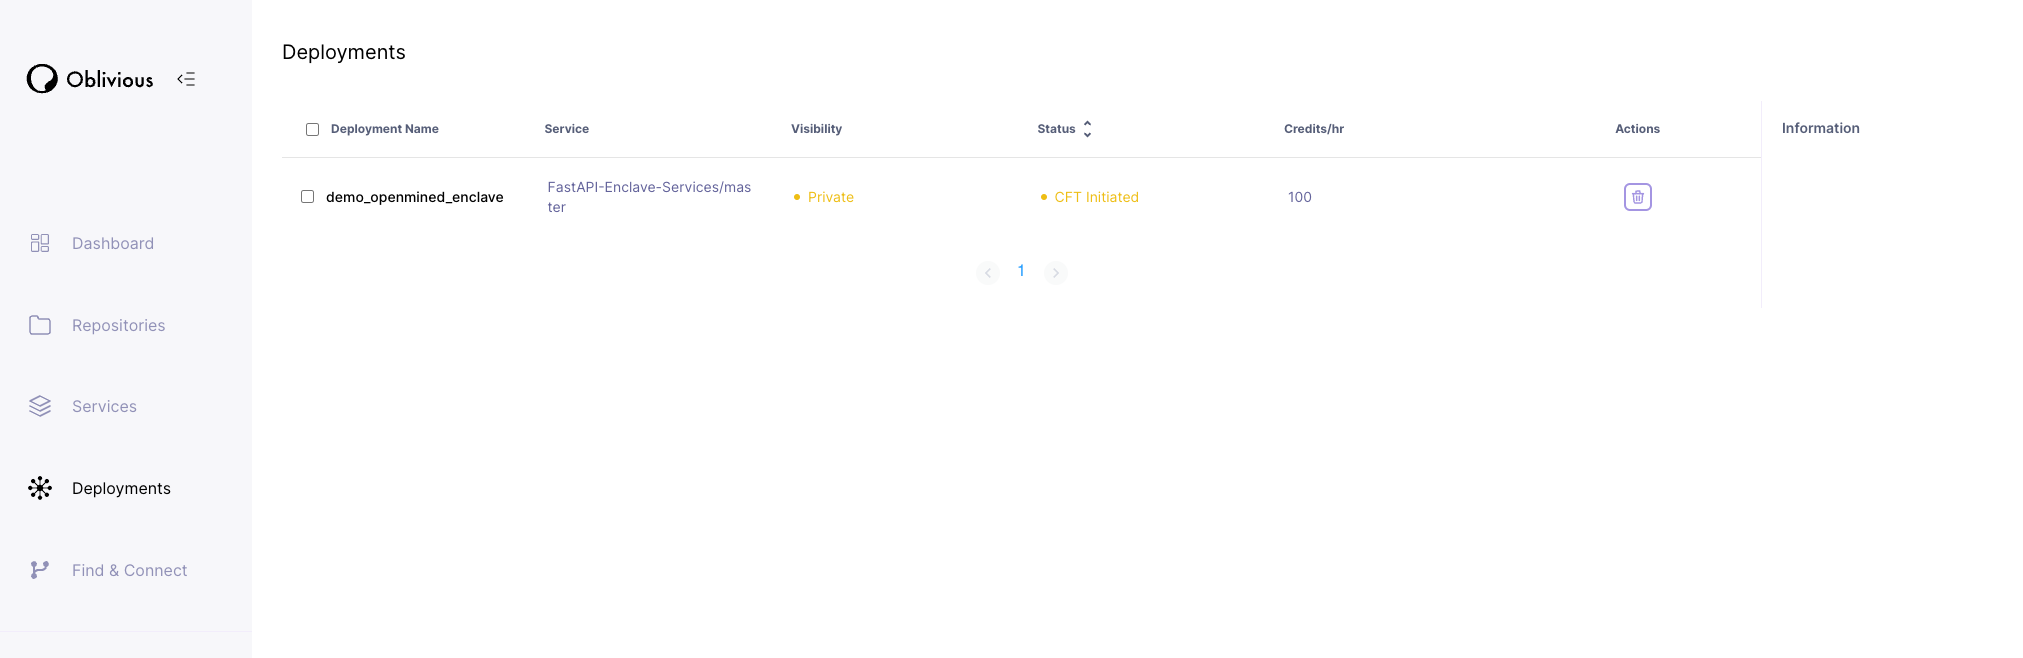

Once if the deployment state has been changed to `Running`, we could start performing computation on the enclaves.

## Oblivious Client Proxy

We need to able to create a oblivious client proxy which would allow the client to interact with the enclaves

Using the `deployment_client` we could check if the proxy is running in the Data Scientist side

In [24]:
depl.check_proxy_running()

False

If it is not running, we could initiate a client proxy at the `Data Scientist` side. <br>
Let's initiate a client proxy on port 3032

In [25]:
depl.initiate_connection(3032)

Successfully connected to proxy on port 3032. The logs can be found at /Users/rasswanth/.oblv_syft_logs/proxy_logs_19_12_2022_18_53_03.log


In a similar way, we could check if the domain nodes are able to connect to the enclaves

In [26]:
alice_ds.oblv.check_connection(depl)
bob_ds.oblv.check_connection(depl)

'Successfully connected to the enclave'

### Magic Time 🪄

Lets perform cross domain computation using enclaves

Initially the domain owners send the datasets to the enclave

In [28]:
alice_dataset = alice_ds.oblv.send_dataset(deployment=depl,dataset=alice_dataset_ptr)
bob_dataset = bob_ds.oblv.send_dataset(deployment=depl,dataset=bob_dataset_ptr)

Let's view the uploaded datasets onto the enclave

In [29]:
depl.get_uploaded_datasets()

[{'id': '02b84c66665349ceb2f02eaf0ea52427', 'owner': 'alice'},
 {'id': '7096b71d7f214c6bae16c770c8f1aa3b', 'owner': 'bob'}]

Lets do a sum operation on the datasets of alice, bob on the encalve

In [31]:
dataset_result = alice_dataset + bob_dataset

In [32]:
dataset_sum_result = dataset_result.sum(keepdims=True)

In [33]:
dataset_sum_result

Lets view the result of the computation, circling back we use the awesome `Automatic Differential Privacy` to add output privacy to the output of the computation

In [34]:
p_id=dataset_sum_result.request_publish(sigma=1000)

The outuput of the publish operation is a unique id where the result is stored in the enclave

Let's initially view the current budget of the Data Scientist

In [35]:
print(alice_ds.privacy_budget)
print(bob_ds.privacy_budget)

999999.0
999999.0


We could check if publish operation has been completed , using `check_publish_request_status` of the `deployment_client`

If the pubish computation has been successfully completed, the enclave would send the `budget_spent` for the query, which would be deducted by the domain nodes

In [36]:
depl.check_publish_request_status(p_id)

Result is ready


Since the result is ready, lets view if the budget was deducted

In [37]:
print(alice_ds.privacy_budget)
print(bob_ds.privacy_budget)

999998.9462728794
999998.9462728794


Lets fetch the result of the computation from the enclave

In [38]:
result = depl.fetch_result(p_id)
print(result)

[-968.2752577905878]


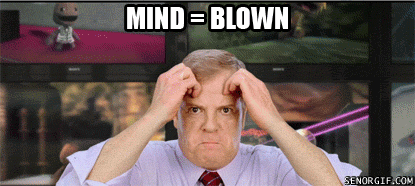

We could also view the operations executed in the enclave using the `deployment client`.

In [39]:
depl.fetch_current_proxy_logs()

Configuration file stored at: "/Users/rasswanth/Library/Application Support/oblv/oblv_config.yaml"

Saved connect command. Use reconnect for reusing cached command.
[2022-12-19T13:23:05Z INFO  lib_ccli::signing] Creating client hello message for handshake with enclave...
[2022-12-19T13:23:05Z INFO  lib_ccli] Establishing connection to enclave https://conso-appli-1u6g29rvq7yb7-943783228.enclave.oblivious.ai:443
[2022-12-19T13:23:05Z INFO  lib_ccli::communication] Sending client hello message to enclave...
[2022-12-19T13:23:07Z INFO  lib_ccli] Received attestation document from enclave.
[2022-12-19T13:23:07Z INFO  lib_ccli] Verifying the received attestation document...
[2022-12-19T13:23:07Z INFO  lib_ccli::attestation_doc] ===> Validate if module id is empty.
[2022-12-19T13:23:07Z INFO  lib_ccli::attestation_doc] ===> Validate digest signature.
[2022-12-19T13:23:07Z INFO  lib_ccli::attestation_doc] ===> Validate PCR map length.
[2022-12-19T13:23:07Z INFO  lib_ccli::attestation_doc] ===>

Kindly also close the deployment after the computation to save on credits.

In [40]:
depl.close_connection()
oblv_client.remove_deployment(depl.deployment_id)

{
  "message": "Delete Deployment Initiated"
}